## Problem Statement : 


+ **Develop a Python program to render a graph of stock prices over the course of 1 year (2017-01-01 to 2017-12-31) for the following companies: Apple, Google, Facebook, Netflix and Amazon from iextrading.com API.**
 
>* Use the timeline as <u>2017-01-01 to 2017-12-31</u> to get the data points from the API.
   
   
>* The data is returned in a JSON format and you might find it convenient to handle it by converting to a csv.
You may also find it convenient to decode the data into UTF-8 before using it.
   
   
>* Plot the data downloaded from the API. Use the “Seaborn” library of python to render a <u>line graph</u>, where:
    * X-Axis: Date, Y-Axis: Price in USD (US Dollars)
    * All the lines for the stocks should be drawn on the same graph with different color schemes.
    * Make the chart pretty and self-explanatory (titles, axes labels, legend, etc.)


+ **Which of the stocks has been volatile during the year 2017 ?**

+ **Do you think the stock price of Google and Amazon are correlated?**

--------------------------------------------

## Solution :

--------------------------------------------

### 1. 0 Issues and Solutions :

>** [iexg/IEX](https://github.com/iexg/IEX-API/) / [issue 380](https://github.com/iexg/IEX-API/issues/380)<br>**<br>
>>* [Joshuablackburn](https://github.com/joshuablackburn-iex) (IEX API Developer/Contributor) replied : "We currently do not have the ability to query by date or date range. The best way at this time is to query for a 2 year chart and filter down the dates."

>>* [IEX Developers](https://iextrading.com/developer/docs/#getting-started) have written [iexfinance](https://pypi.org/project/iexfinance/), an unofficial library for accessing [IEXTrading APIs](https://api.iextrading.com/1.0) endpoints.

--------------------------------------------

__Libraries/Modules required for the solution :__ <br>

* *iexfiance* : Python module to get stock data from the Investors Exchange (IEX) Developer API platform.<br>
* *requests* : HTTP library for Python.<br>
* *seaborn* : Seaborn is a library for making attractive and informative statistical graphics in Python. <br>
* *matplotlip* : Matplotlib is a Python 2D plotting library. <br>
* *pandas* : Real world data analysis tool in Python. <br>
* *numpy* : NumPy is a array-processing package designed to efficiently manipulate large multi-dimensional arrays. <br>
* *json* : Package for json manipulation. <br>
* *csv* : Package for csv manipulation. <br>
* *datetime* : Encapsulation of date/time values. <br>

--------------------------------------------

----
+ #### Proposed Solution Flowchart
![Solution Flowchart](./solution.png "Solution")
+ iexfinance library methods recieves data in JSON format and depending on 'output-format' specification data is stored.
---

**Following cell installs all modules required for this solution.** <br>
**Please Uncomment the bash command by deleting (hash).**

In [1]:
#%%bash

#pip3 install iexfinance, requests, matplotlib, seaborn, pandas, numpy

#Open editor to set PYTHONPATH permanatly.
#gedit /home/$USER/.bashrc

#Use above command or manually open .bashrc file and paste below line at the end of the file.
#export PYTHONPATH=$HOME/.local/lib/python3.5/site-packages/ 


#source .barshrc
#<!--------Applies path changes system wid.---!>

#echo "We're All Set!"
#echo "Please restart the notebook-server and its parent shell."
#exit

-------
+ ### Exoprt libraries/modules in the program.

In [2]:
from iexfinance import Stock, get_historical_data
from datetime import datetime
import requests

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

import pandas as pd
from pandas import DataFrame 

import json
import csv

-------
+ ###  [Retrieving Historical Data](https://addisonlynch.github.io/iexfinance/historical.html) 
>Historical time series data is available through the top-level *get_historical_data* method, which sources the [chart](https://iextrading.com/developer/docs/#chart) endpoint.<br> datetime objects (start, end) helps *get_historical_data* method to retieve data for specific period of time. <br><br>
> A simple get request would've seen like this <br> 
*r =request.get("https://api.iextrading.com/1.0/stock/market/batch?symbols=aapl,fb,amzn,goog,nflx&types=chart&range=2y")*
where client recieves response data in JSON format. <br><br>
request parameter "symbols" specifies the comapny, "chart" specifies historically adjusted market-wide data and "range" specifies which data and how much data client wants to retrieve.<br><br>
>*get_historical_data* method returns pandas.core.frame.DataFrame
 which can be easily encoded into UTF-8 and exported to CSV.

In [3]:
start = datetime(2017, 1, 1)
end = datetime(2017, 12, 31)

In [4]:
getAppleData = get_historical_data('AAPL',start,end, output_format="pandas")
dataCvs = open("apple.csv", "w")
getAppleData.to_csv("apple.csv", sep='\t', encoding='utf-8')

getAmazonData = get_historical_data('AMZN',start,end, output_format="pandas")
dataCvs = open("amazon.csv", "w")
getAmazonData.to_csv("amazon.csv", sep='\t', encoding='utf-8')

getFacebookData = get_historical_data('FB',start,end, output_format="pandas")
dataCvs = open("facebook.csv", "w")
getFacebookData.to_csv("facebook.csv", sep='\t', encoding='utf-8')

getGoogleData = get_historical_data('GOOG',start,end, output_format="pandas")
dataCvs = open("google.csv", "w")
getGoogleData.to_csv("google.csv", sep='\t', encoding='utf-8')

getNetflixData = get_historical_data('NFLX',start,end, output_format="pandas")
dataCvs = open("netfilx.csv", "w")
getNetflixData.to_csv("netfilx.csv", sep='\t', encoding='utf-8')

----
### [Seaborn](https://seaborn.pydata.org/)
>Seaborn is a library for making attractive and informative statistical graphics in Python.<br>
It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures.<br>
This solution uses [seaborn.set_style()](https://seaborn.pydata.org/generated/seaborn.set_style.html) for setting the aesthetic style of the plot.<br>
This solution uses [seaborn.set_palette()](https://seaborn.pydata.org/generated/seaborn.set_palette.html) for setting the matplotlib color cycle using a seaborn palette.

---

### [matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
>Plot y versus x as lines and/or markers.<br>
+ *plt.rcParams* - rcParams used to customize all kinds of properties in "matplotlib" dynamically.
+ *plt.title* - Sets plot title.
+ *plt.xlabel* - Sets label to x axis.
+ *plt.ylabel* - Sets label to y axis.
+ *plt.legend* - Sets legend of plot at specified position.
+ *plt.xlim* - Set the x limits of the current axes.
+ *plt.ylim* = Set the y limits of the current axes.
+ *plt.xtick* - Get or set the current tick locations and labels of the x-axis.

---

### Plot Summary
>get_historical_data() has 251 records.<br>
Date has been scaled on x - axis.<br>
Stock Close Price(USD) has been scaled on y - axis.<br>

---

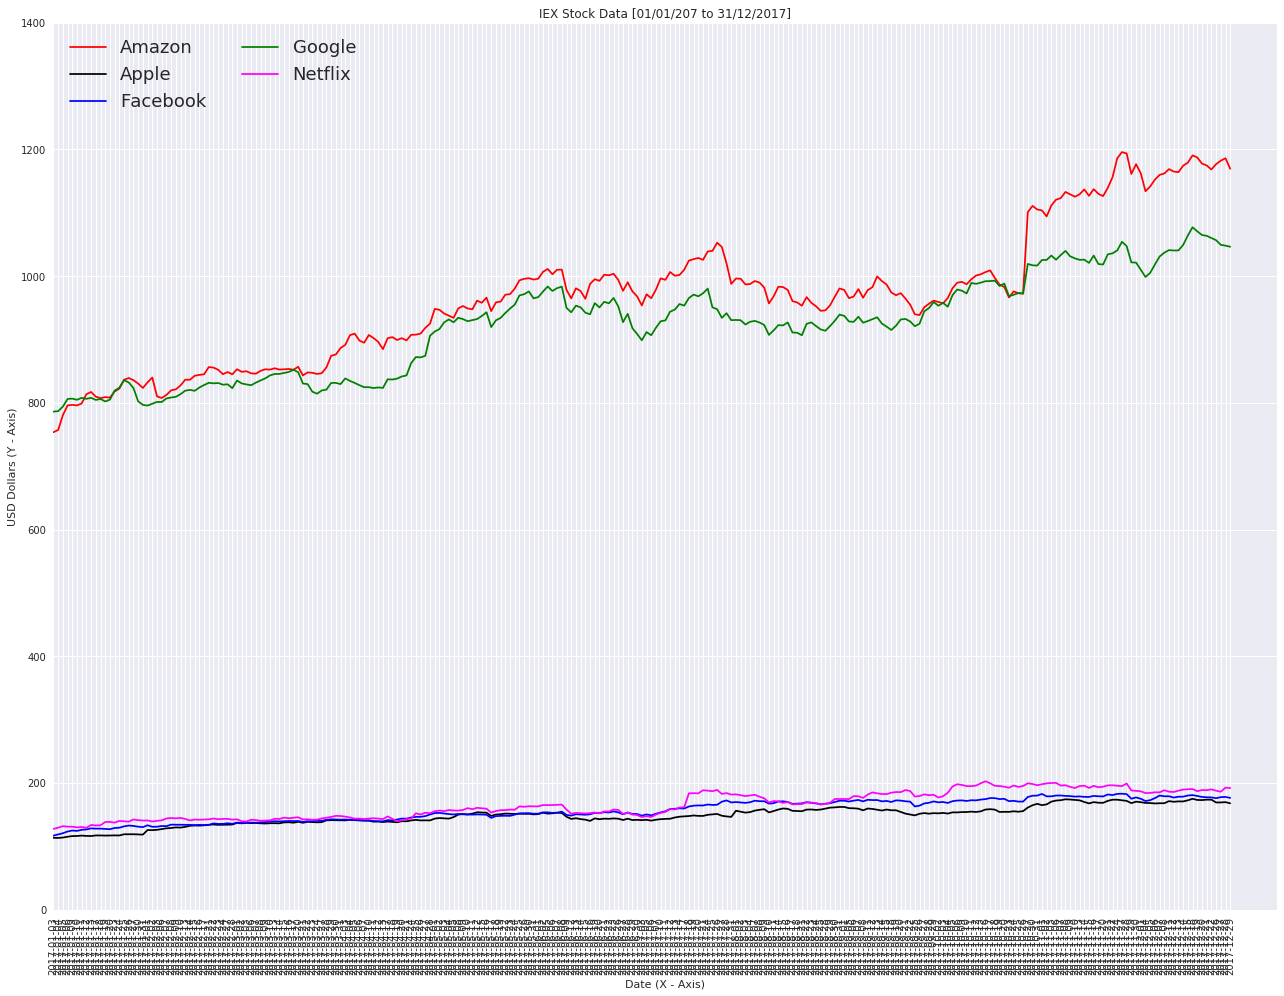

In [5]:
sns.set()
sns.set_style("darkgrid")
sns.set_palette("husl")

plt.rcParams['figure.figsize'] = 18.0,14.0 #For Clear Resoultion
#plt.rcParams['figure.figsize'] = 28.0,20.0 #For Clear Resoultion
plt.rcParams['figure.edgecolor'] = "black"

    
plt.title("IEX Stock Data [01/01/207 to 31/12/2017]")
plt.xlabel("Date (X - Axis)")
plt.ylabel("USD Dollars (Y - Axis)")


plt.plot(getAmazonData["close"], color='red')
plt.plot(getAppleData["close"], color='black')
plt.plot(getFacebookData["close"], color='blue')
plt.plot(getGoogleData["close"], color='green')
plt.plot(getNetflixData["close"], color='magenta')

plt.xticks(rotation=90)
plt.xlim(0,260)
plt.ylim(0,1400)
plt.tight_layout()


plt.legend(["Amazon","Apple", "Facebook","Google","Netflix"], ncol=2, loc='upper left', fontsize=18);
plt.show()

---

### [Volatility of Stock](http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:standard_deviation_volatility)
>Standard deviation is a measure of volatility.<br>
Dispersion is the difference between the actual value and the average value.<br> 
The larger this dispersion or variability is, the higher the standard deviation. The smaller this dispersion or variability is, the lower the standard deviation. <br>

---

### Standard Deviation Calculation
>1. Calculate the average (mean) price for the number of periods or observations.
2. Determine each period's deviation (close less average price).
3. Square each period's deviation.
4. Sum the squared deviations.
5. Divide this sum by the number of observations.
6. The standard deviation is then equal to the square root of that number.

---

### [Programmatically Standard Deviation Calculation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
> + *pandas.DataFrame.std()* <br>
This solution uses builtin method std() of pandas.Dataframe which calculates sample standard deviation over requested axis and returns.

---

In [6]:
print("From : 01/01/2017 To : 31/12/2017, Standard Deviation of (251 Entries)\n")
print("Standard Deviation For Amazon (close price)\t:\t", getAmazonData.close.std())
print("Standard Deviation For Apple (close price)\t:\t", getAppleData.close.std())
print("Standard Deviation For Facebook (close price)\t:\t", getFacebookData.close.std())
print("Standard Deviation For Google (close price)\t:\t", getGoogleData.close.std())
print("Standard Deviation For Netflix (close price)\t:\t", getNetflixData.close.std())

From : 01/01/2017 To : 31/12/2017, Standard Deviation of (251 Entries)

Standard Deviation For Amazon (close price)	:	 106.58020990519702
Standard Deviation For Apple (close price)	:	 15.061398019205164
Standard Deviation For Facebook (close price)	:	 17.379058102013104
Standard Deviation For Google (close price)	:	 77.23299164377752
Standard Deviation For Netflix (close price)	:	 21.29564148257999


---

### [matplotlib.subplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html)
>Return a subplot axes at the given grid position.
+ Creating a subplot will delete any pre-existing subplot that overlaps with it beyond sharing a boundary
+ *plt.show* plots and displays 2d plot on notebook/screen.

+ pandas.Dataframe.std method return Standard Deviation for given axis.<br>
+ This subplot is combination of Stock Close Price Comaprision and Standard Deviation comparision for Apple, Amazon, Facebook, Google and Netflix <br>


### Plot Summary
>+ Amazon has the greatest Standard Deviation Value.
+ Shared x - axis represents date.(251 records)
+ y - axis represents Stock Price and Avg Stock Price in respective subplots.

---

/home/muhammad/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


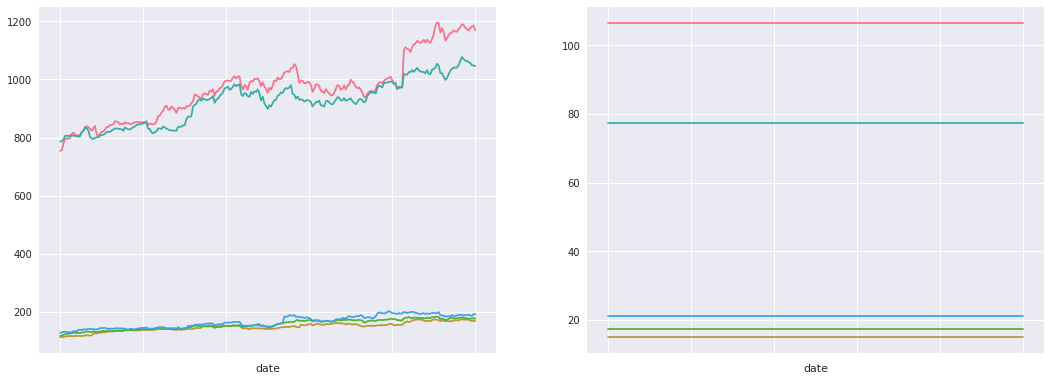

In [7]:
df = getAmazonData
df['STD'] = getAmazonData.close.std()

ax1 = plt.subplot(2, 2, 1)
df["close"].plot()
ax2 = plt.subplot(2, 2, 2)
df['STD'].plot()

df = getAppleData
df['STD'] = getAppleData.close.std()

ax1 = plt.subplot(2, 2, 1)
df["close"].plot()
ax2 = plt.subplot(2, 2, 2)
df['STD'].plot()

df = getFacebookData
df['STD'] = getFacebookData.close.std()

ax1 = plt.subplot(2, 2, 1)
df["close"].plot()
ax2 = plt.subplot(2, 2, 2)
df['STD'].plot()

df = getGoogleData
df['STD'] = getGoogleData.close.std()

ax1 = plt.subplot(2, 2, 1)
df["close"].plot()
ax2 = plt.subplot(2, 2, 2)
df['STD'].plot()

df = getNetflixData
df['STD'] = getNetflixData.close.std()

ax1 = plt.subplot(2, 2, 1)
df["close"].plot()
ax2 = plt.subplot(2, 2, 2)
df['STD'].plot()

plt.show()

---
### The most volatile stock : Amazon
---

---
### [Correlation](https://pythonfordatascience.org/correlation-python/#intro)
> + A correlation is a statistical test of association between variables that is measured on a -1 to 1 scale.<br> 
The closer the correlation value is to -1 or 1 the stronger the association, the closer to 0, the weaker the association. <br>It measures how change in one variable is associated with change in another variable.<br><br>
    + Positive correlation: as one variable increases so does the other. <br>
    + Negative (inverse) correlation: as one variable increases the other variable decreases. <br>
    + No correlation: there is no association between the changes in the two variables. <br><br>
+ The strength of the correlation matters. The closer the absolute value is to -1 or 1, the stronger the correlation.
r
![Correlation Coefficent](./rValue.png "r Value") <br>
>+ This solution uses *pandas.Dataframe.corr* method for calculating correlation between two variable sets.<br>
>[pandas.DataFrame.corr](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.corr.html)
which compute pairwise correlation of columns

---

---
### [matplotlib.scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
> + Plots a scatter plot of y vs x with varying marker size and/or color.
+ Scatter plots show how much one variable is affected by another. <br> The relationship between two variables is called their correlation .

### Plot Summary
>+ Scatter Plot show how strongly stock prices of Google and Amazon are correlated.<br>
+ **Correlation between Amazon and Google "Close" Stock Price : 0.9566212646553631** <br>
>+ r value between 0.7 – 1.0 denotes *Strong correlation*.<br>


/home/muhammad/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


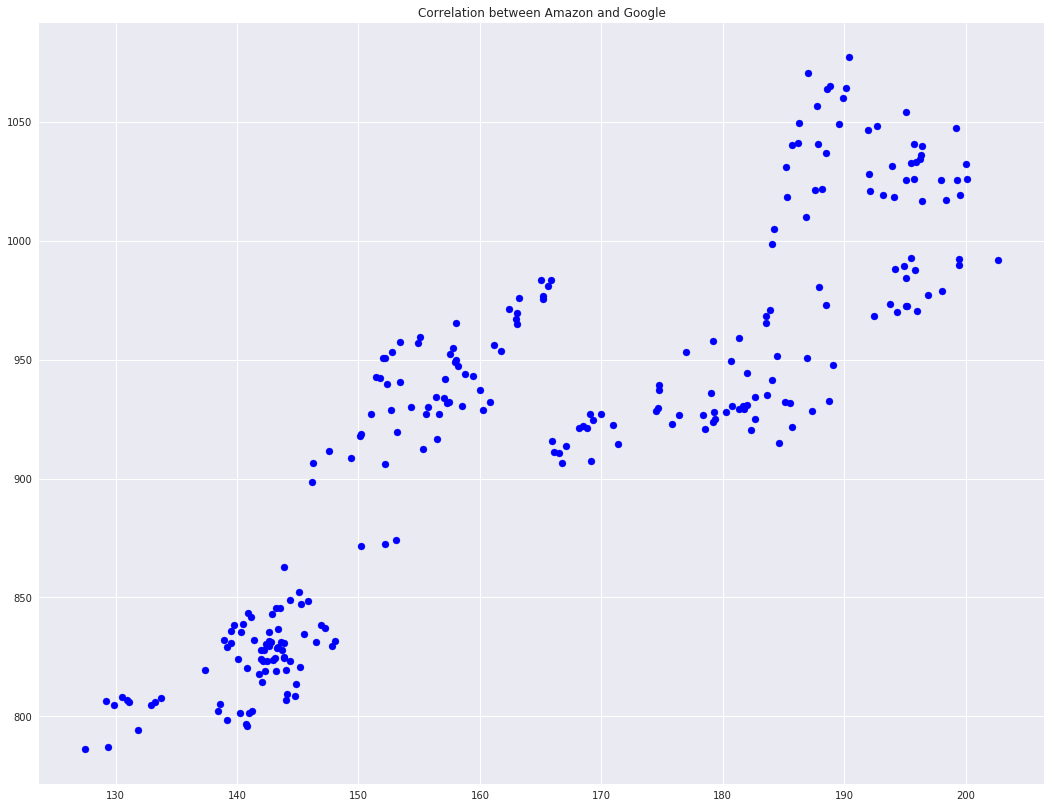

In [8]:
dfAmzn = pd.DataFrame(getAmazonData)
dfGoog =  pd.DataFrame(getGoogleData)

#dfAmzn[["close"]].describe()
#dfGoog[["close"]].describe()

df["googleClose"] = dfGoog["close"] #Adding new column to Dataframe
dfCombo = dfAmzn.append(df)

dfCombo['close'].corr(dfCombo['googleClose'])
sns.set()

x = dfCombo.close
y = dfCombo.googleClose

plt.title("Correlation between Amazon and Google")
plt.xlabel = "Amazon Close Stock price"
plt.ylabel = "Google Close Stock price"
plt.scatter(x,y, c="blue")
plt.show()

---
### The stock price of Google and Amazon are **strongly correlated**.
---